# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, SS17

# Assignment 10

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Naive Bayes Classifier [40 points]

The Naive Bayes classifier is a quite simple and popular classifier that is entirely based on a conditional independence assumption. Let's suppose that we have a set of $n$ features $F_1, F_2, ..., F_n$ and a class label $C$. The Naive Bayes classifier assumes that the features are independent of each other given a known class label, which is another way of saying that

\begin{equation*}
    P(C, F_1, F_2, ..., F_n) = P(F_1, F_2, ..., F_n|C)P(C) = P(C)\prod_{i}{P(F_i|C)}
\end{equation*}

Now, the classification problem is to determine the class label given the values of the features $F_1, F_2, ..., F_n$. If we have $m$ classes, we can find the class label by calculating $P(C_j|F_1, F_2, ..., F_n)$ for $1 \leq j \leq m$

\begin{equation*}
    P(C_j|F_1, F_2, ..., F_n) = \frac{P(C_j, F_1, F_2, ..., F_n)}{P(F_1, F_2, ..., F_n)} = \frac{P(C_j)\prod_{i}{P(F_i|C_j)}}{P(F_1, F_2, ..., F_n)} = \alpha P(C_j)\prod_{i}{P(F_i|C_j)}
\end{equation*}

and then choosing

\begin{equation*}
    k = \max_{j}P(C_j|F_1, F_2, ..., F_n)
\end{equation*}

as the class label. In the above equation, we notice that $P(F_1, F_2, ..., F_n)$ doesn't have to be calculated explicitly, i.e. instead of calculating $P(F_1, F_2, ..., F_n)$, we can calculate $P(C_j)\prod_{i}{P(F_i|C_j)}$ for $1 \leq j \leq m$ and then normalise the values using $\alpha = \sum_{j}{P(C_j)\prod_{i}{P(F_i|C_j)}}$.

In this exercise, you will implement your very own Naive Bayes classifier that can be used for predicting the stability of object placements on a table. The scenario is one in which our robot Jenny is putting objects on a table, such that we'll suppose that the robot chooses a random continuous table pose for placement and then tries to predict whether placing a *point object* there will be successful by describing the pose with a few features.

The scenario we are considering is visualised from a top view in the image below (note: the blue square is the table, the red squares are the objects on it, and the orange dot is Jenny).

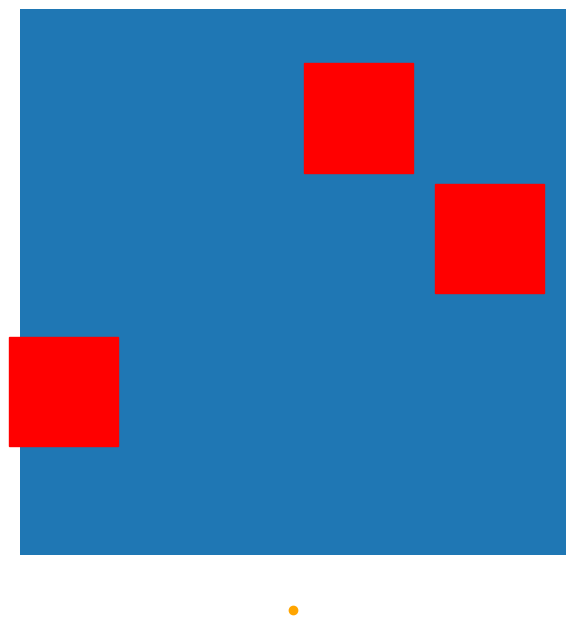

In [4]:
import IPython
IPython.core.display.Image("images/configuration.png", embed=True)

Let's suppose that a pose is described using the following features, all of which are discrete:

* *Inside table*: Takes the values $0$ and $1$, corresponding to whether a pose is outside or inside the table respectively.
* *Distance to the robot*: Takes the values $0$, $1$, and $2$, corresponding to *very close*, *reachable*, and *far*.
* *Minimum distance to the other objects*: Takes the values $0$, $1$, and $2$, corresponding to *very close*, *close*, and *far*.
* *Distance to the closest surface edge*: Also takes the values $0$, $1$, and $2$, corresponding to *very close*, *close*, and *far*.

Each pose either leads to a successful execution or not, so we have two classes, namely $0$ and $1$, corresponding to the outcomes *failure* and *success* respectively.

Your task now consists of the following steps:

* You are given a data set (*data/train.txt*) of features describing $1500$ poses and the class labels of these. Use the data in this data set for learning the prior probabilities $P(C_j)$ and the conditional probabilities $P(F_i|C_j)$, $i \in \{ 1, 2, 3, 4 \}$, $j \in \{ 1, 2\}$. Note that *learning* in this context means calculating the values of the probabilities as relative frequencies.
* Use the test data set (*data/test.txt*) for testing your classifier (i.e. predict the class labels of the $500$ test points using the given features and compare the predicted labels with the actual labels).

The labelled training and test data are visualised below (the green and black points correspond to stable and unstable placements respectively):

Training data | Test data
- | - 
![alt](images/training_data.png) | ![alt](images/test_data.png)

Implement your classifier below, plot your predicted labels (use the coordinates of the test points in *data/test_points.txt* for that purpose), and report the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) of your results on the test set.

In [9]:

"""Training Bayes Classifier"""


train=np.loadtxt('data/train.txt')

P_F1, P_F2, P_F3, P_F4=[], [], [], []
P_C0_F1, P_C0_F2, P_C0_F3, P_C0_F4=[], [], [], []
P_C1_F1, P_C1_F2, P_C1_F3, P_C1_F4=[], [], [], []

C_count=0
F1_0_count, F1_1_count =0, 0
F2_0_count, F2_1_count, F2_2_count =0, 0, 0 
F3_0_count, F3_1_count, F3_2_count =0, 0, 0
F4_0_count, F4_1_count, F4_2_count =0, 0, 0

F1_0_C0_count, F1_1_C0_count =0, 0
F2_0_C0_count, F2_1_C0_count, F2_2_C0_count =0, 0, 0 
F3_0_C0_count, F3_1_C0_count, F3_2_C0_count =0, 0, 0
F4_0_C0_count, F4_1_C0_count, F4_2_C0_count =0, 0, 0

for i in range(train.shape[0]):
    if train[i][4]- 0<=1e-8:
        C_count+=1
        
        #Calculating P(F_1|C0)
        if train[i][0]- 0<=1e-8:
            F1_0_C0_count+=1
        elif train[i][0]- 1<=1e-8:
            F1_1_C0_count+=1

        #Calculating P(F_2|C0)
        if train[i][1]- 0<=1e-8:
            F2_0_C0_count+=1
        elif train[i][1]- 1<=1e-8:
            F2_1_C0_count+=1
        elif train[i][1]- 2<=1e-8:
            F2_2_C0_count+=1

        #Calculating P(F_3|C0)
        if train[i][2]- 0<=1e-8:
            F3_0_C0_count+=1
        elif train[i][2]- 1<=1e-8:
            F3_1_C0_count+=1
        elif train[i][2]- 2<=1e-8:
            F3_2_C0_count+=1

        #Calculating P(F_4|C0)
        if train[i][3]- 0<=1e-8:
            F4_0_C0_count+=1
        elif train[i][3]- 1<=1e-8:
            F4_1_C0_count+=1
        elif train[i][3]- 2<=1e-8:
            F4_2_C0_count+=1
    
    #Calculating P(F_1)
    if train[i][0]- 0<=1e-8:
        F1_0_count+=1
    elif train[i][0]- 1<=1e-8:
        F1_1_count+=1
    
    #Calculating P(F_2)
    if train[i][1]- 0<=1e-8:
        F2_0_count+=1
    elif train[i][1]- 1<=1e-8:
        F2_1_count+=1
    elif train[i][1]- 2<=1e-8:
        F2_2_count+=1
    
    #Calculating P(F_3)
    if train[i][2]- 0<=1e-8:
        F3_0_count+=1
    elif train[i][2]- 1<=1e-8:
        F3_1_count+=1
    elif train[i][2]- 2<=1e-8:
        F3_2_count+=1
    
    #Calculating P(F_4)
    if train[i][3]- 0<=1e-8:
        F4_0_count+=1
    elif train[i][3]- 1<=1e-8:
        F4_1_count+=1
    elif train[i][3]- 2<=1e-8:
        F4_2_count+=1

P_C0=round(C_count/train.shape[0],2)
P_C1=round(1-P_C0,2)
            
P_F1.append(round(F1_0_count/train.shape[0],2))
P_F1.append(round(F1_1_count/train.shape[0],2))
        
P_F2.append(round(F2_0_count/train.shape[0],2))
P_F2.append(round(F2_1_count/train.shape[0],2))
P_F2.append(round(F2_2_count/train.shape[0],2))

P_F3.append(round(F3_0_count/train.shape[0],2))
P_F3.append(round(F3_1_count/train.shape[0],2))
P_F3.append(round(F3_2_count/train.shape[0],2))

P_F4.append(round(F4_0_count/train.shape[0],2))
P_F4.append(round(F4_1_count/train.shape[0],2))
P_F4.append(round(F4_2_count/train.shape[0],2))
""""""
P_C0_F1.append(round(float(F1_0_C0_count)/C_count,2))
P_C0_F1.append(round(float(F1_1_C0_count)/C_count,2))
        
P_C0_F2.append(round(F2_0_C0_count/C_count,2))
P_C0_F2.append(round(F2_1_C0_count/C_count,2))
P_C0_F2.append(round(F2_2_C0_count/C_count,2))

P_C0_F3.append(round(F3_0_C0_count/C_count,2))
P_C0_F3.append(round(F3_1_C0_count/C_count,2))
P_C0_F3.append(round(F3_2_C0_count/train.shape[0],2))

P_C0_F4.append(round(F4_0_C0_count/C_count,2))
P_C0_F4.append(round(F4_1_C0_count/C_count,2))
P_C0_F4.append(round(F4_2_C0_count/C_count,2))

""""""
P_C1_F1.append(round(1-P_C0_F1[0],2))
P_C1_F1.append(round(1-P_C0_F1[1],2))
        
P_C1_F2.append(round(1-P_C0_F2[0],2))
P_C1_F2.append(round(1-P_C0_F2[1],2))
P_C1_F2.append(round(1-P_C0_F2[2],2))

P_C1_F3.append(round(1-P_C0_F3[0],2))
P_C1_F3.append(round(1-P_C0_F3[1],2))
P_C1_F3.append(round(1-P_C0_F3[2],2))

P_C1_F4.append(round(1-P_C0_F4[0],2))
P_C1_F4.append(round(1-P_C0_F4[1],2))
P_C1_F4.append(round(1-P_C0_F4[2],2))
print("-")     
print P_C0_F1

-
[0.38, 0.62]


In [6]:
def prob_CF(f1,f2,f3,f4):
    c=0
    if (f1==0):
        F1=P_F1[0]
        FC1=P_C0_F1[0]
    else:
        F1=P_F1[1]
        FC1=P_C0_F1[1]
    """"""
    if (f2==0):
        F2=P_F2[0]
        FC2=P_C0_F2[0]
    elif (f2==1):
        F2=P_F2[1]
        FC2=P_C0_F2[1]
    else:
        F2=P_F2[2]
        FC2=P_C0_F2[2]
    """"""
    if (f3==0):
        F3=P_F3[0]
        FC3=P_C0_F3[0]
    elif (f3==1):
        F3=P_F3[1]
        FC3=P_C0_F3[1]
    else:
        F3=P_F3[2]
        FC3=P_C0_F3[2]
    """"""
    if (f4==0):
        F4=P_F4[0]
        FC4=P_C0_F4[0]
    elif (f4==1):
        F4=P_F4[1]
        FC4=P_C0_F4[1]
    else:
        F4=P_F4[2]
        FC4=P_C0_F4[2]
   
    P_C_F=P_C0*FC1*FC2*FC3*FC4/(F1*F2*F3*F4)
    if (P_C_F<0.5):
        c=1
    return c

In [7]:
test=np.loadtxt('data/test.txt')
test_points=np.loadtxt('data/test_points.txt')

C_predicted=np.zeros(test.shape[0])
C_actual=np.zeros(test.shape[0])

plt.figure(1,figsize=(8, 6))
plt.title('Predicted')
plt.figure(2, figsize=(8, 6))
plt.title('Actual')
cnt=0
for i in range(test.shape[0]):
    f1,f2,f3,f4=test[i][0],test[i][1],test[i][2],test[i][3]
    C_predicted[i]=prob_CF(f1,f2,f3,f4)
    C_actual[i]=test[i][4]
    if (C_predicted[i]!= C_actual[i]):
        #print (i)
        cnt+=1
    if (C_predicted[i]-0<1e-8):
        col='black'
    else:
        col='green'
    if (C_actual[i]-0<1e-8):
        col2='black'
    else:
        col2='green'
    plt.figure(1)
    plt.scatter(test_points[i][0],test_points[i][1], color=col)
    plt.figure(2)
    plt.scatter(test_points[i][0],test_points[i][1], color=col2)

print ("Number of unmatched predictions: ",cnt)
plt.figure(1)
img = plt.imread("images/configuration.png")
plt.imshow(img, extent=[-1, 6, -1, 6])
plt.figure(2)
img = plt.imread("images/configuration.png")
plt.imshow(img, extent=[-1, 6, -1, 6])
plt.show()



ZeroDivisionError: float division by zero

## Exercise 2: Total Probability and Bayes' Rule [40 points]

Let's suppose that there is a box of tools in the RoboCup@Work lab which has $20$ wrenches, $50$ screwdrivers, and $30$ pairs of pliers, such that we let one of our youBots pick up a single tool from the box at random. From historical data, we know that there is a $0.2$ probability that the robot will drop a wrench, a $0.1$ probability that it will drop a screwdriver, and a $0.3$ probability that it will drop a pair of pliers; in other words,

$P(d|w) = 0.2 \hspace{2cm} P(d|s) = 0.1 \hspace{2cm} P(d|p) = 0.3$

where $d$ is the event in which the youBot drops a tool, while $w, s$, and $p$ are the events in which the robot picks up a wrench, a screwdriver, and a pair of pliers respectively. If the youBot drops a tool, a human operator puts the tool back into the gripper and the robot continues its operation.

1. What is the probability that the robot drops a tool?
2. If we know that the robot has dropped a tool, what is the probability that it had picked up a pair of pliers?
3. Show that the probability that the youBot had picked up a screwdriver given two observed drops is equal to $$P(s|d_1,d_2) = \frac{P(d_2|s)P(s|d_1)}{P(d_2|s)P(s|d_1) + P(d_2|w)P(w|d_1) + P(d_2|p)P(p|d_1)}$$ which means that, if we want to calculate the probability that the robot had picked up a screwdriver given two drops, we first need to calculate the posterior probabilities that the robot had picked up any of the tools after dropping the tool for the first time (which can in fact be seen as updating the prior probabilities in a recursive manner).
4. Generalise the above result to the case in which we observe $n$ drops.

### write your answers here ####